## Assignment 5: Natural Language Processing | Data Mining AD699 | Advait Pillai

### 1,2. Loading and filtering the dataset based on my favourite episode of The Office

In [4]:
import pandas as pd

df = pd.read_csv("the_office.csv") 

season = 3
episode = 10

df_episode = df[(df['season'] == season) & (df['episode'] == episode)]
df_episode.head()

,id,season,episode,scene,line_text,speaker,deleted
12226,12227,3,10,1,Merry Christmas! [holds up dead goose and puts...,Dwight,False
12227,12228,3,10,1,Merry Christ--[looks up] NO! Why... why did yo...,Pam,False
12228,12229,3,10,1,"Don't worry, she's dead. Oh wait. He's dead.",Dwight,False
12229,12230,3,10,1,"Dwight, what uh...",Pam,False
12230,12231,3,10,1,I accidentally ran over it. It's a Christmas m...,Dwight,False


In [15]:
df.head()

,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False


### 3. Top 10 characters that had the most lines

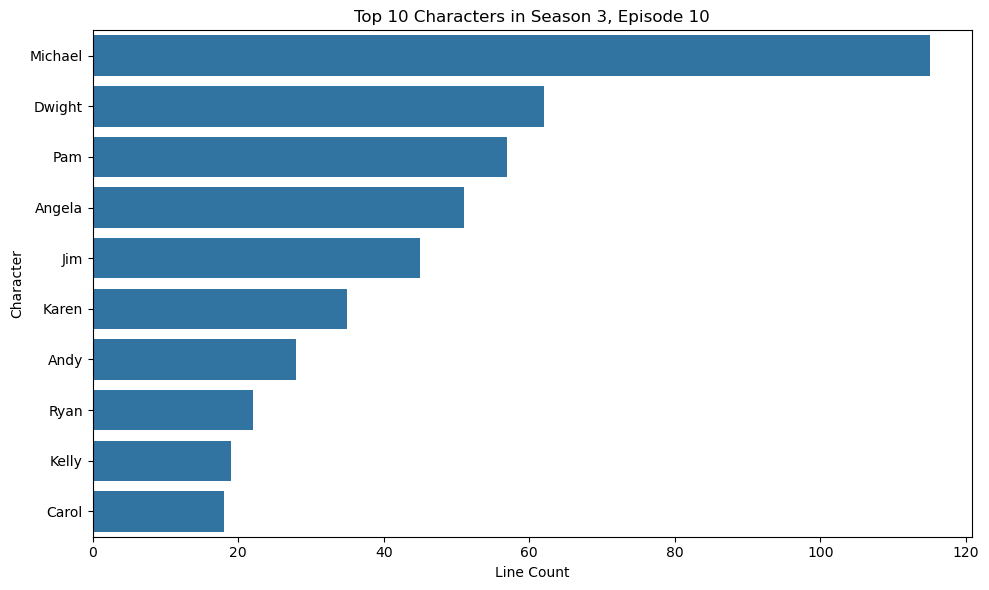

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

top_characters = df_episode['speaker'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_characters.values, y=top_characters.index, orient='h')
plt.title(f"Top 10 Characters in Season {season}, Episode {episode}")
plt.xlabel("Line Count")
plt.ylabel("Character")
plt.tight_layout()
plt.show()

To understand character prominence in the episode, I counted the number of lines spoken by each character and visualized the top 10 using a horizontal bar plot. The chart clearly shows that Michael had the highest number of lines, significantly more than any other character, which suggests he was the focal point of this episode. He is followed by Dwight, Pam, and Angela, indicating a heavier dialogue presence among the main cast as expected.

This bar plot helps identify central characters and provides a quick glimpse into the narrative focus of the episode. For example, Michael’s dominance in dialogue likely means the episode revolves around him — either through his actions, leadership decisions, or comedic moments. Similarly, characters like Dwight and Pam having a high count suggests active involvement in subplots

### 4. Making a new dataframe

In [20]:
lines_df = df_episode[['line_text']].dropna()
lines_df.head()

,line_text
12226,Merry Christmas! [holds up dead goose and puts...
12227,Merry Christ--[looks up] NO! Why... why did yo...
12228,"Don't worry, she's dead. Oh wait. He's dead."
12229,"Dwight, what uh..."
12230,I accidentally ran over it. It's a Christmas m...


In [30]:
import re

# Flatten all lines into one long list of words using regex tokenizer
all_words = []
for line in lines_df['line_text']:
    tokens = re.findall(r'\b\w+\b', line.lower())  # This grabs only alphanumeric words
    all_words.extend(tokens)

words_df = pd.DataFrame(all_words, columns=['word'])
words_df.head()

,word
0,merry
1,christmas
2,holds
3,up
4,dead


To prepare the text for further natural language processing, I first extracted the line_text column from the episode dataframe. I then tokenized each line using a regular expression-based approach, which efficiently splits the lines into individual words by capturing alphanumeric tokens.

Each word was converted to lowercase for normalization and stored in a new dataframe, where each row represents a single word.

### 5. Frequency Analysis

In [28]:
from collections import Counter

word_counts = Counter(words_df['word'])
top_10_raw = word_counts.most_common(10)
top_10_raw

[('i', 285),
 ('you', 250),
 ('to', 177),
 ('the', 153),
 ('s', 128),
 ('and', 127),
 ('a', 122),
 ('it', 111),
 ('t', 92),
 ('that', 87)]

Using the tokenized word dataframe, I calculated the 10 most frequently used words in the episode. These words are primarily stopwords — short, common words that don’t carry much analytical value on their own.

#### Why is this list of limited value?
This list is dominated by pronouns, conjunctions, and prepositions. Words like "i", "you", "the", and "and" are extremely frequent in nearly all English texts. They don’t offer insight into who is speaking, what the topic is, or what the episode is about — which limits their usefulness in theme or sentiment analysis.

In [32]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_df['word'] if word not in stop_words]
filtered_counts = Counter(filtered_words)
top_10_filtered = filtered_counts.most_common(10)
top_10_filtered

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\advpi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


[('know', 52),
 ('oh', 48),
 ('party', 45),
 ('michael', 40),
 ('like', 37),
 ('pum', 34),
 ('hey', 31),
 ('think', 31),
 ('christmas', 30),
 ('ok', 29)]

After removing standard English stopwords using nltk, the 10 most common words revealed more about the episode’s content.These terms reflect a mix of character dialogue (e.g., "oh", "hey", "ok") and episode-specific content — such as "party", "michael", and "christmas", strongly suggesting a holiday-themed episode featuring typical workplace banter.

#### Using Bigrams instead of Unigrams

In [34]:
from nltk import bigrams

bigram_list = list(bigrams(filtered_words))
bigram_counts = Counter(bigram_list)
top_10_bigrams = bigram_counts.most_common(10)

top_10_bigrams = [(' '.join(pair), count) for pair, count in top_10_bigrams]
top_10_bigrams

[('pum pum', 24),
 ('break room', 12),
 ('would like', 10),
 ('la la', 7),
 ('parum pum', 7),
 ('merry christmas', 6),
 ('let go', 6),
 ('oh oh', 5),
 ('walks away', 5),
 ('c mon', 5)]

These bigrams offer deeper insight into the episode’s rhythm and themes. The recurrence of “pum pum”, “parum pum”, and “la la” suggest a musical subplot, possibly a character singing or a recurring holiday jingle. Phrases like “merry christmas”, “break room”, and “walks away” provide scene-level detail, capturing both festive context and workplace dynamics.

#### How are bigrams different from unigrams?

Unigrams are individual words analyzed in isolation, while bigrams are pairs of consecutive words that appear together in the text. Bigrams capture the local context and relationships between words, revealing phrases, expressions, or repeated patterns that unigrams alone cannot.

While unigram analysis can tell us which words are most frequent — like "party" or "christmas" — bigram analysis reveals phrases like "merry christmas" or "pum pum", which carry more nuanced, situational meaning. Bigrams highlight the structure and style of dialogue, helping to uncover jokes, idioms, or scene-specific vocabulary that are lost in individual word counts.

#### Why is it useful or interesting to see this list of frequently-used words?
Looking at the most frequent unigrams and bigrams from the episode provides a quick, data-driven snapshot of the episode's tone, themes, and character dynamics. For instance, bigrams like "pum pum" and "parum pum" suggest a humorous or musical subplot, while "break room" and "merry christmas" confirm the episode’s holiday setting. This kind of analysis could be used for content tagging, automatic episode summarization, or even training an AI to mimic the show's writing style — especially in identifying unique expressions that define a show's voice.

### 6. Word Cloud

In [49]:
!pip install wordcloud

   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   ----- --------------------------------- 41.0/301.2 kB 653.6 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/301.2 kB 980.4 kB/s eta 0:00:01
   ---------------------------------------- 301.2/301.2 kB 2.1 MB/s eta 0:00:00


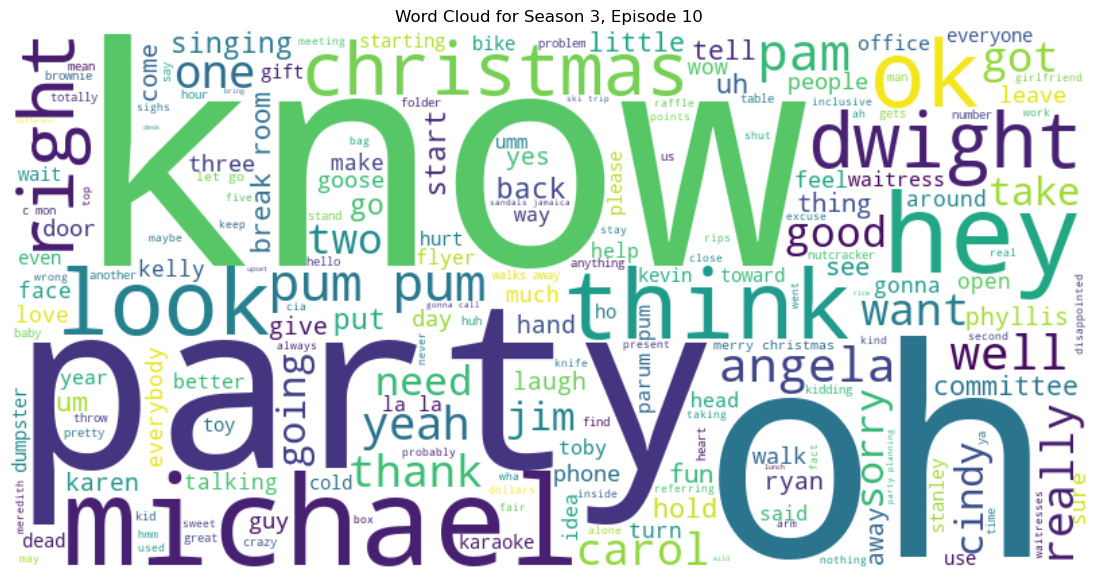

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_string = ' '.join(filtered_words)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text_string)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Season 3, Episode 10")
plt.show()

The most prominent words in the cloud include "know," "party," "oh," "michael," "christmas," "think," and "hey" — reinforcing the idea that this episode revolves around a Christmas party, likely led or disrupted by Michael. Words like "pum," "parum," and "la" suggest a musical or performance-related subplot, while "break room," "gift," and "committee" allude to typical office holiday chaos. Dialogue fillers like “oh,” “ok,” and “yeah” reflect the casual, comedic tone of the show.

This word cloud is useful for quickly identifying themes, character presence, and even recurring jokes — without needing to read through the full episode transcript.

### 7. Sentiment Analysis

In [57]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Analyze each word's sentiment score
sentiment_scores = [(word, sia.polarity_scores(word)['compound']) for word in filtered_words]

# Sort by absolute sentiment score (positive or negative)
top_sentiment_words = sorted(sentiment_scores, key=lambda x: abs(x[1]), reverse=True)

# Create a dictionary to keep only one score per unique word (take first occurrence)
unique_scores = {}
for word, score in sentiment_scores:
    if word not in unique_scores:
        unique_scores[word] = score

top_10_sentiment_words = sorted(unique_scores.items(), key=lambda x: abs(x[1]), reverse=True)[:10]
top_10_sentiment_words

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\advpi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[('killed', -0.6705),
 ('dead', -0.6486),
 ('best', 0.6369),
 ('paradise', 0.6369),
 ('love', 0.6369),
 ('great', 0.6249),
 ('awesome', 0.6249),
 ('worst', -0.6249),
 ('war', -0.5994),
 ('miracle', 0.5859)]

To analyze emotional tone in the episode, I used NLTK’s VADER Sentiment Analyzer to score each word from the filtered dataset. I then sorted the unique words by absolute compound sentiment score, revealing those with the strongest emotional impact.

Positive Words: 6

Negative Words: 4

This mix of highly charged words paints a vivid picture of The Office’s emotional landscape: wild swings between positivity (e.g., “love,” “paradise,” “miracle,” “awesome”) and absurd negativity (e.g., “dead,” “killed,” “worst,” “war”). It suggests the episode contains exaggerated, emotionally reactive language, possibly used for comedic effect — like someone dramatically saying “this is the worst Christmas party ever” while being handed a thoughtful gift.

The sentiment range reflects the show's signature tone: high-stakes emotions over hilariously low-stakes situations. This kind of analysis could be used to track tonal shifts, flag intense scenes, or even generate content summaries that highlight emotional moments in the script.